## IMDb Votes (Votos en IMDb)
--Medidas de tendencia central: La media indica el número promedio de votos que recibe cada episodio. Si la mediana es menor que la media, indica que hay episodios con una cantidad de votos mucho mayor al promedio, lo que podría ser causado por episodios especialmente populares.

--Medidas de dispersión: Un rango amplio y una alta desviación estándar sugieren que algunos episodios son mucho más populares que otros, generando una mayor dispersión en los datos de votos.
### Gráficos:
--Histograma: Muestra la frecuencia de episodios por cantidad de votos, lo cual puede revelar si hay una mayoría de episodios con pocos votos y pocos episodios con muchos votos.

--Polígono de frecuencias: Te permite ver si hay una tendencia específica en los votos, como una concentración en ciertos intervalos.

--Ojiva: Una ojiva de pendiente más pronunciada en los valores bajos indica que la mayoría de episodios tiene una cantidad de votos baja.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir(r"C:\Users\Martina\Documents\TUP\Estadistica y Probabilidad\TPI")

# Carga el archivo CSV en un dataframe de Pandas
df = pd.read_csv('data\simpsons_episodes.csv')
# Imprime el dataframe
print(df)

# Función para calcular medidas de tendencia central
def calcular_medidas_tendencia_central(serie):
    media = serie.mean()       # Media aritmética
    mediana = serie.median()   # Mediana
    moda = serie.mode()        # Moda (puede haber más de una moda)
    return media, mediana, moda

# Función para calcular medidas de dispersión
def calcular_medidas_dispersion(serie):
    rango = serie.max() - serie.min()  # Rango
    varianza = serie.var()             # Varianza
    desviacion_estandar = serie.std()  # Desviación estándar
    return rango, varianza, desviacion_estandar

      id                                          image_url  imdb_rating  \
0     10  http://static-media.fxx.com/img/FX_Networks_-_...          7.4   
1     12  http://static-media.fxx.com/img/FX_Networks_-_...          8.3   
2     14  http://static-media.fxx.com/img/FX_Networks_-_...          8.2   
3     17  http://static-media.fxx.com/img/FX_Networks_-_...          8.1   
4     19  http://static-media.fxx.com/img/FX_Networks_-_...          8.0   
..   ...                                                ...          ...   
595  500  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   
596  502  http://static-media.fxx.com/img/FX_Networks_-_...          7.3   
597  511  http://static-media.fxx.com/img/FX_Networks_-_...          6.9   
598  542  http://static-media.fxx.com/img/FX_Networks_-_...          6.4   
599  548  http://static-media.fxx.com/img/FX_Networks_-_...          7.0   

     imdb_votes  number_in_season  number_in_series original_air_date  \
0        1511.

In [2]:
#TABLA DE DISTRIBUCIÓN DE FRECUENCIAS
votes = df['imdb_votes'].dropna()


# Define el número de clases usando la fórmula de Sturges
num_classes = int(1 + 3.322 * np.log10(len(votes)))

# Crea el histograma para obtener las frecuencias
freq_abs, bins = np.histogram(votes, bins=num_classes)
freq_rel = freq_abs / len(votes)  # Frecuencia relativa
freq_cum = np.cumsum(freq_abs)     # Frecuencia acumulada

# Tabla de frecuencias
freq_table_votes = pd.DataFrame({
    'Clase': [f"{int(bins[i])} - {int(bins[i+1])}" for i in range(len(bins)-1)],
    'Frecuencia Absoluta': freq_abs,
    'Frecuencia Relativa': freq_rel,
    'Frecuencia Acumulada': freq_cum
})

print(freq_table_votes)

         Clase  Frecuencia Absoluta  Frecuencia Relativa  Frecuencia Acumulada
0    104 - 467                   72             0.120603                    72
1    467 - 830                  289             0.484087                   361
2   830 - 1193                  125             0.209380                   486
3  1193 - 1556                   77             0.128978                   563
4  1556 - 1919                   28             0.046901                   591
5  1919 - 2282                    4             0.006700                   595
6  2282 - 2645                    1             0.001675                   596
7  2645 - 3008                    0             0.000000                   596
8  3008 - 3371                    0             0.000000                   596
9  3371 - 3734                    1             0.001675                   597


In [3]:
print("------------------------------------------")
media, mediana, moda = calcular_medidas_tendencia_central(votes)
print(f"Medidas de tendencia central para votes:")
print(f"  Media: {media}")
print(f"  Mediana: {mediana}")
print(f"  Moda: {moda.tolist()}\n")  # Convertimos a lista para legibilidad

------------------------------------------
Medidas de tendencia central para votes:
  Media: 832.3651591289782
  Mediana: 697.0
  Moda: [554.0, 562.0, 585.0]



In [4]:
print("------------------------------------------")
rango, varianza, desviacion_estandar = calcular_medidas_dispersion(votes)
print(f"Medidas de dispersión para votes:")
print(f"  Rango: {rango}")
print(f"  Varianza: {varianza}")
print(f"  Desviación Estándar: {desviacion_estandar}\n")

------------------------------------------
Medidas de dispersión para votes:
  Rango: 3630.0
  Varianza: 156909.4201263589
  Desviación Estándar: 396.11793714291565



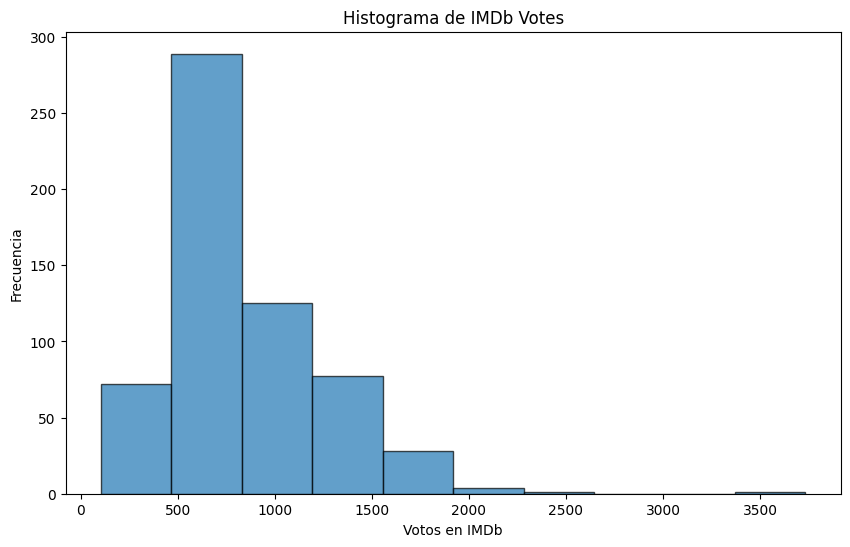

In [5]:
# Histograma
plt.figure(figsize=(10, 6))
plt.hist(votes, bins=num_classes, edgecolor='black', alpha=0.7)
plt.title("Histograma de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia")
plt.show()

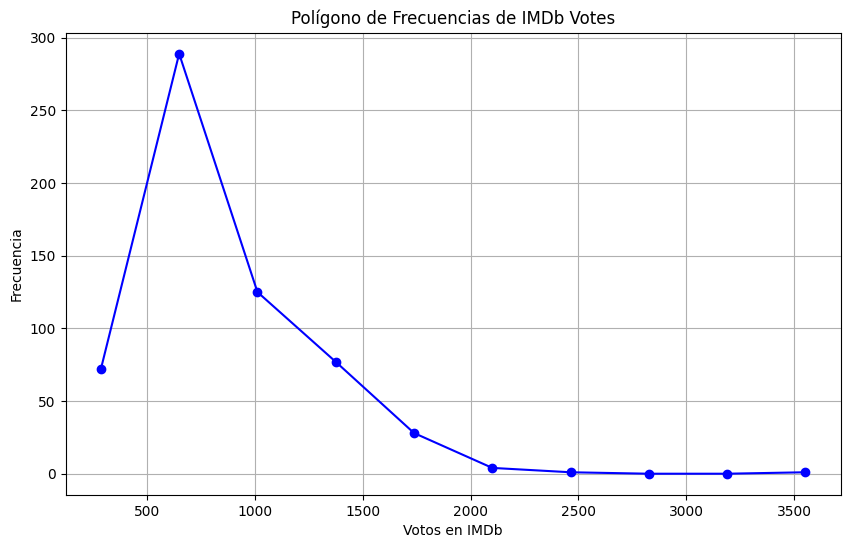

In [6]:
# Polígono de Frecuencias
# Calcula las frecuencias absolutas y los puntos medios de cada clase
freq_abs, bins = np.histogram(votes, bins=num_classes)
class_midpoints = (bins[:-1] + bins[1:]) / 2  # Puntos medios de cada clase

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_abs, marker='o', linestyle='-', color='b')
plt.title("Polígono de Frecuencias de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

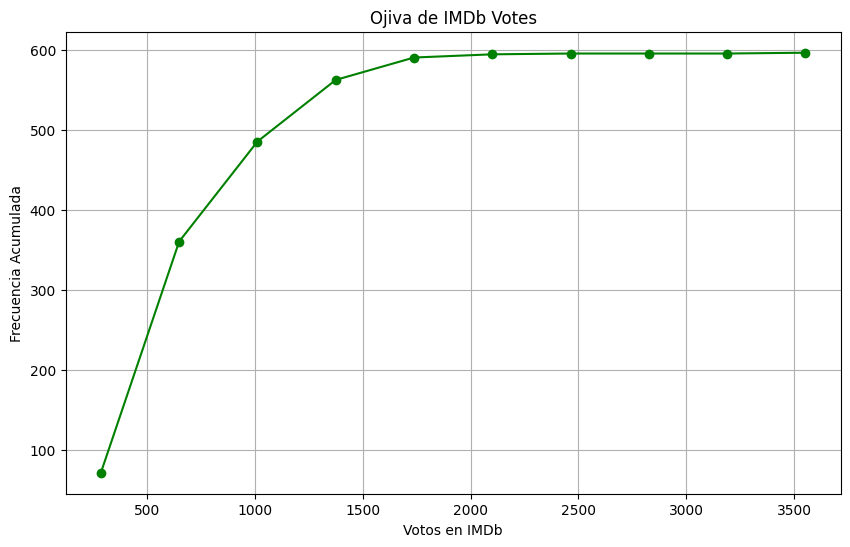

In [7]:
# Ojiva (Frecuencia Acumulada)
freq_cum = np.cumsum(freq_abs)

plt.figure(figsize=(10, 6))
plt.plot(class_midpoints, freq_cum, marker='o', linestyle='-', color='g')
plt.title("Ojiva de IMDb Votes")
plt.xlabel("Votos en IMDb")
plt.ylabel("Frecuencia Acumulada")
plt.grid(True)
plt.show()